**Stractegic Plan of Action:**

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:

1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Feature Engineering
5. Predictive Modelling
6. Project Outcomes & Conclusion

# 1. Data Exploration

In [1]:
# importing required libraries

import os  # Provides functions for interacting with the operating system
import math  # Provides mathematical functions and constants
import scipy  # Provides scientific computing and optimization functions
import numpy as np  # Provides numerical computing capabilities
import pandas as pd  # Provides data manipulation and analysis tools
import seaborn as sns  # Provides data visualization functions based on Matplotlib
import datetime as dt  # Provides classes for manipulating dates and times
from geopy.distance import geodesic  # Provides distance calculations between coordinates
from tqdm import tqdm  # Provides a progress bar for iterating over sequences
from IPython.display import display  # Provides methods for displaying output in Jupyter Notebook

from statsmodels.formula import api  # Provides a formula interface for specifying statistical models
from sklearn.feature_selection import RFE  # Provides recursive feature elimination for feature selection
from sklearn.preprocessing import StandardScaler  # Provides methods for standardizing data
from sklearn.model_selection import train_test_split  # Provides functions for splitting data into training and testing sets
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Provides variance inflation factor calculations

from sklearn.decomposition import PCA  # Provides Principal Component Analysis for dimensionality reduction
from sklearn.linear_model import Ridge  # Implements Ridge regression
from sklearn.linear_model import Lasso  # Implements Lasso regression
from sklearn.linear_model import ElasticNet  # Implements Elastic Net regression
from sklearn.linear_model import LinearRegression  # Implements Linear Regression
from sklearn.ensemble import RandomForestClassifier  # Implements Random Forest Classifier
from sklearn.preprocessing import PolynomialFeatures  # Provides methods for generating polynomial features
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Provides evaluation metrics for regression models

import matplotlib.pyplot as plt  # Provides data visualization capabilities using Matplotlib
plt.rcParams['figure.figsize'] = [10, 6]  # Sets the default figure size for plots

import warnings
warnings.filterwarnings('ignore')  # Ignores warning messages during code execution

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data Science Projects/Uber Predict Fare/Uber Rideshare Data.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# looking at the initial dataset, we can see that we have 2 columns "unnamed: 0" and "key" that seem irrelevant for our task today and we can begin by dropping them

columns_to_drop = ['Unnamed: 0','key']

df = df.drop(columns = columns_to_drop)

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.shape

(200000, 7)

In [6]:
# checking for null values in the dataset
print(df.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [7]:
# looking at the data, we can see only 1 record in the dropoff_longitude and dropoff_latitude is missing. We can drop that record
df = df.dropna()

# checking for null values in the dataset
print(df.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [8]:
df.shape

(199999, 7)

we have now deleted the null records and our data has no missing values

In [9]:
# we will now add columns year, quarter, month, week, day, hour to our dataframe using 'pickup_datetime' feature

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['year'] = df['pickup_datetime'].dt.year
df['quarter'] = df['pickup_datetime'].dt.quarter
df['month'] = df['pickup_datetime'].dt.month
df['week'] = df['pickup_datetime'].dt.week
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17


In [10]:
# before converting the latitide and longitude to distance, we will first filter any records with invalid latitudes and longitudes

df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

df.shape

(199987, 13)

Comparing the shape of the dataframe, we did drop a few records with invalid values

In [11]:
# we will now calculate the distance for each Uber ride


df['distance'] = df.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                               (row['dropoff_latitude'], row['dropoff_longitude'])).miles, axis=1)

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19,1.044594
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20,1.525071
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21,3.131464
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8,1.032372
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17,2.786061


In [12]:
# rounding the 'Distance' data field to 2 decimal places

df['distance'] = round(df['distance'],1)

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19,1.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20,1.5
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21,3.1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8,1.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17,2.8


In [13]:
# adding a new field to categories the time of the day

categories = [0, 4, 8, 12, 16, 20, 24]
labels = ['midnight', 'early_morning', 'morning', 'afternoon', 'evening', 'night']

# Convert the 'Hour' field into the new category field
df['time_of_day'] = pd.cut(df['hour'], bins=categories, labels=labels, right=False)

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour,distance,time_of_day
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19,1.0,evening
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20,1.5,night
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21,3.1,night
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8,1.0,morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17,2.8,evening


In [14]:
# now that we have made necessary modifictions for the 'pickup_datetime' field, we can drop it

df = df.drop('pickup_datetime', axis = 1)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour,distance,time_of_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19,1.0,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20,1.5,night
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21,3.1,night
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8,1.0,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17,2.8,evening


In [15]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour,distance,time_of_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19,1.0,evening
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20,1.5,night
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21,3.1,night
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8,1.0,morning
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17,2.8,evening


In [16]:
# creating clusters in the data based on pickup_latitude and pickup_longitude 
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
df['location_cluster'] = kmeans.fit_predict(df[['pickup_latitude', 'pickup_longitude']])

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,quarter,month,week,day,hour,distance,time_of_day,location_cluster
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,2,5,19,7,19,1.0,evening,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,3,7,29,17,20,1.5,night,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,3,8,35,24,21,3.1,night,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,6,26,26,8,1.0,morning,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,35,28,17,2.8,evening,0


In [17]:
df['location_cluster'].unique()

array([0, 1, 3, 2, 4], dtype=int32)

In [18]:
drop_columns = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']

df = df.drop(columns = drop_columns,axis = 1)

In [19]:
# save modified dataframe to a csv file

file_path = '/content/drive/MyDrive/Data Science/Data Science Projects/Uber Predict Fare/Modified Data/modified.csv'

df.to_csv(file_path, index = False, header = True)

In [20]:
df.head()

,fare_amount,passenger_count,year,quarter,month,week,day,hour,distance,time_of_day,location_cluster
0,7.5,1,2015,2,5,19,7,19,1.0,evening,0
1,7.7,1,2009,3,7,29,17,20,1.5,night,0
2,12.9,1,2009,3,8,35,24,21,3.1,night,0
3,5.3,3,2009,2,6,26,26,8,1.0,morning,0
4,16.0,5,2014,3,8,35,28,17,2.8,evening,0


# 2. Exploratory Data Analysis

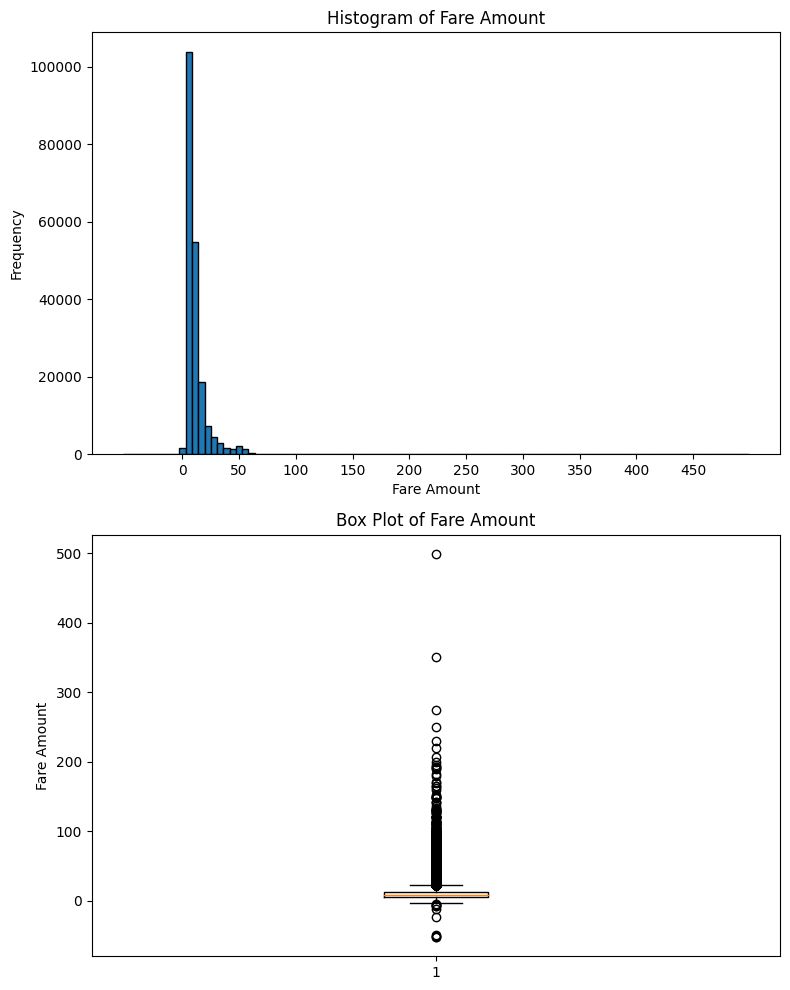

In [21]:
# visualizing the target variable

fare_amount = df['fare_amount']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plotting the histogram
ax1.hist(fare_amount, bins=100, edgecolor='black')

# Adding labels and title to the histogram
ax1.set_xlabel('Fare Amount')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Fare Amount')

# Setting the x-axis ticks every 20
ax1.set_xticks(range(0, int(max(fare_amount)) + 1, 50))

# Plotting the box plot
ax2.boxplot(fare_amount)

# Adding labels and title to the box plot
ax2.set_ylabel('Fare Amount')
ax2.set_title('Box Plot of Fare Amount')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The chart above shows us that the data is skewed and a large portion of the rides are below 50, closer to 0. 

Also, the box plot shows that the target variable has some outliers we may need to address later.

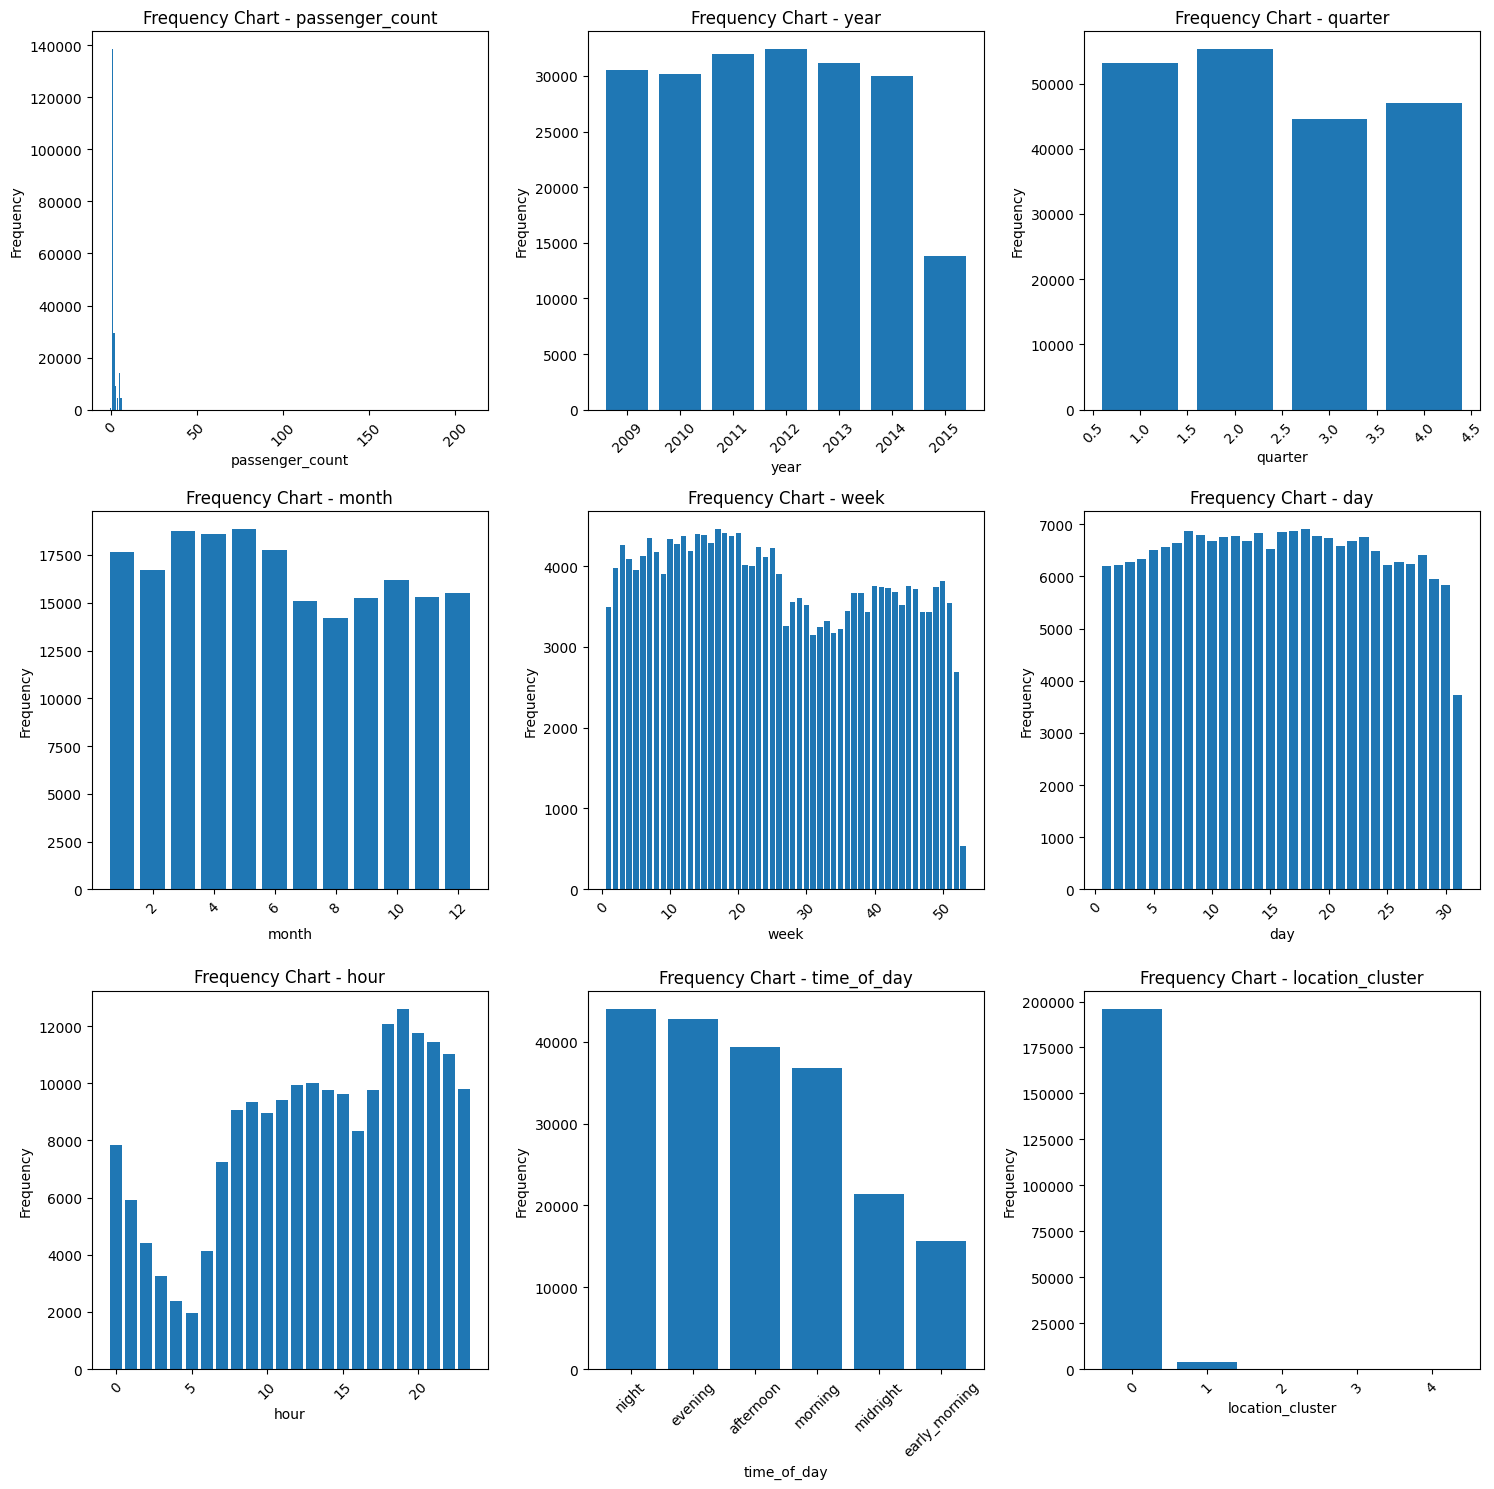

In [22]:
# comparing frequency distributions of categorical variables

categorical_vars = ['passenger_count', 'year', 'quarter', 'month', 'week', 'day', 'hour', 'time_of_day', 'location_cluster']

# Define the layout of subplots
num_rows = 3  # Number of rows in the subplot grid
num_cols = 3  # Number of columns in the subplot grid

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Plotting frequency charts for each categorical variable
for i, var in enumerate(categorical_vars):
    # Count the frequency of each category
    counts = df[var].value_counts()
    
    # Sort the categories based on frequency
    sorted_categories = counts.index
    
    # Plotting the frequency chart
    axes[i].bar(sorted_categories, counts)
    
    # Adding labels and title
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Frequency Chart - {var}')
    
    # Rotating x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

**Observations from the charts above**


1.   We have approximately 30k records from year 2009-2014. For the year 2015, we have only around 15k records.
2.   Midnight & Early Morning have fewer rides as compared to other parts of the day. This would be considered normal behavior.
3.   Most our data is for location cluster 0, and only a small % of data is for other location clusters. It would be helpful to balance this later.


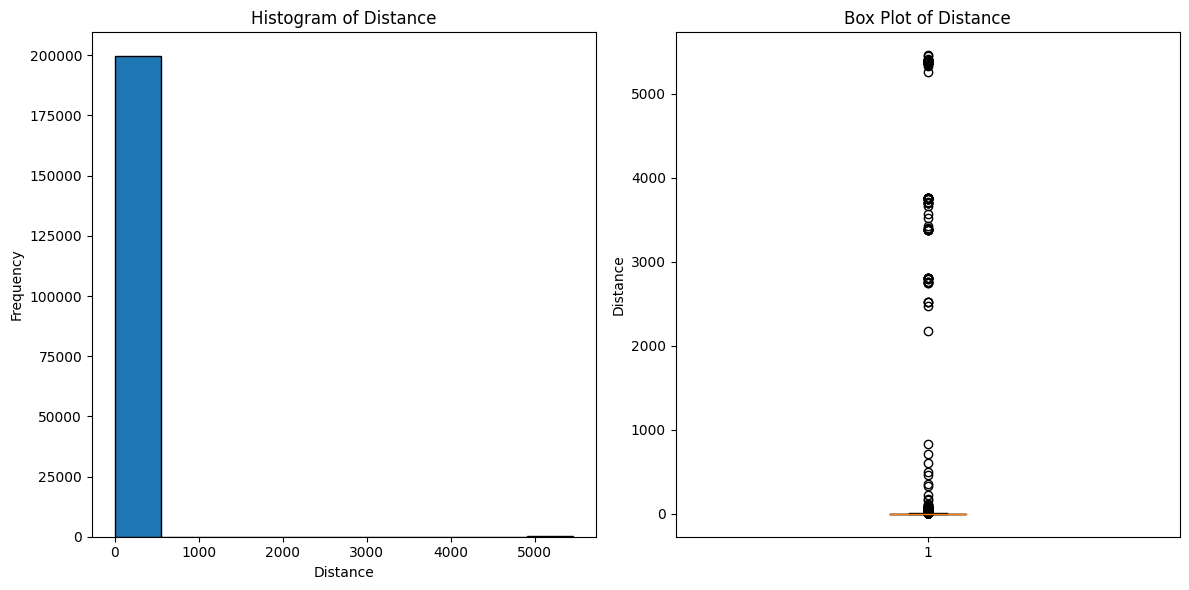

In [23]:
# Visualizing the numerical features in the dataframe

distance = df['distance']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram
axes[0].hist(distance, bins=10, edgecolor='black')

# Adding labels and title to the histogram
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Distance')

# Plotting the box plot
axes[1].boxplot(distance)

# Adding labels and title to the box plot
axes[1].set_ylabel('Distance')
axes[1].set_title('Box Plot of Distance')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

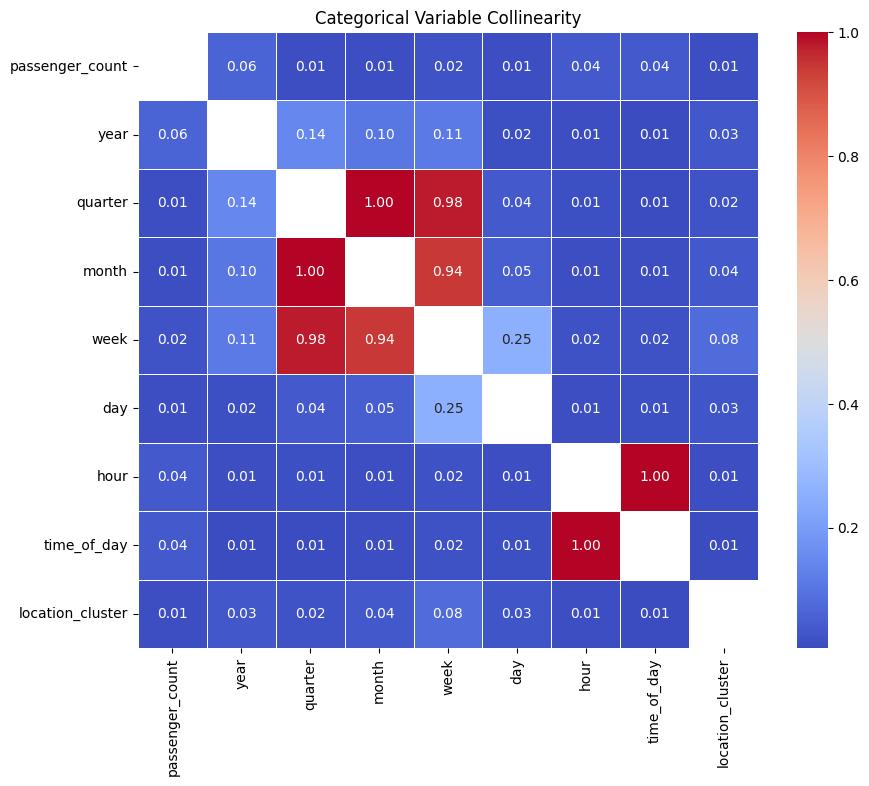

In [24]:
# checking for multicollineaity between categorical variables

from scipy.stats import chi2_contingency

# Assuming 'df' is your dataframe containing the categorical variables

# Select the categorical variables
categorical_vars = ['passenger_count', 'year', 'quarter', 'month', 'week', 'day', 'hour', 'time_of_day', 'location_cluster']

# Create an empty correlation matrix
corr_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate the Cramér's V statistic for each pair of variables
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            corr_matrix.loc[var1, var2] = cramers_v

# Convert the correlation matrix to numeric values
corr_matrix = corr_matrix.apply(pd.to_numeric)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Categorical Variable Collinearity')
plt.show()

Following variables seem to have high collinearity between them and need to be addressed:


1.   time_of_day & hour
2.   month & quarter
3.   week & quarter
4.   month and week



# 3. Data Preprocessing

In [25]:
from tabulate import tabulate

# Assuming 'fare_amount' is a column in your dataframe 'df'
fare_amount = df['fare_amount']

# Define the range intervals
ranges = [
    ('Below 0', fare_amount < 0),
    ('0-50', (fare_amount >= 0) & (fare_amount <= 50)),
    ('51-100', (fare_amount > 50) & (fare_amount <= 100)),
    ('101 - Max', fare_amount > 100)
]

# Calculate the percentage of records in each range
percentage_records = []
total_records = len(fare_amount)
for label, condition in ranges:
    count = len(fare_amount[condition])
    percentage = (count / total_records) * 100
    percentage_records.append([label, percentage])

# Create the table
table_headers = ['Range', 'Percentage']
table = tabulate(percentage_records, headers=table_headers, floatfmt=".2f")

# Display the table
print(table)

Range        Percentage
---------  ------------
Below 0            0.01
0-50              98.69
51-100             1.26
101 - Max          0.04


In [26]:
# based on the distribution we see above, we can delete all records that are below 0 and above 50 to build a generalized model

# Drop records where 'fare_amount' is below 0 or above 50
df = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 50)]

# Reset the index of the modified dataframe
df.reset_index(drop=True, inplace=True)

In [27]:
df.shape

(197364, 11)

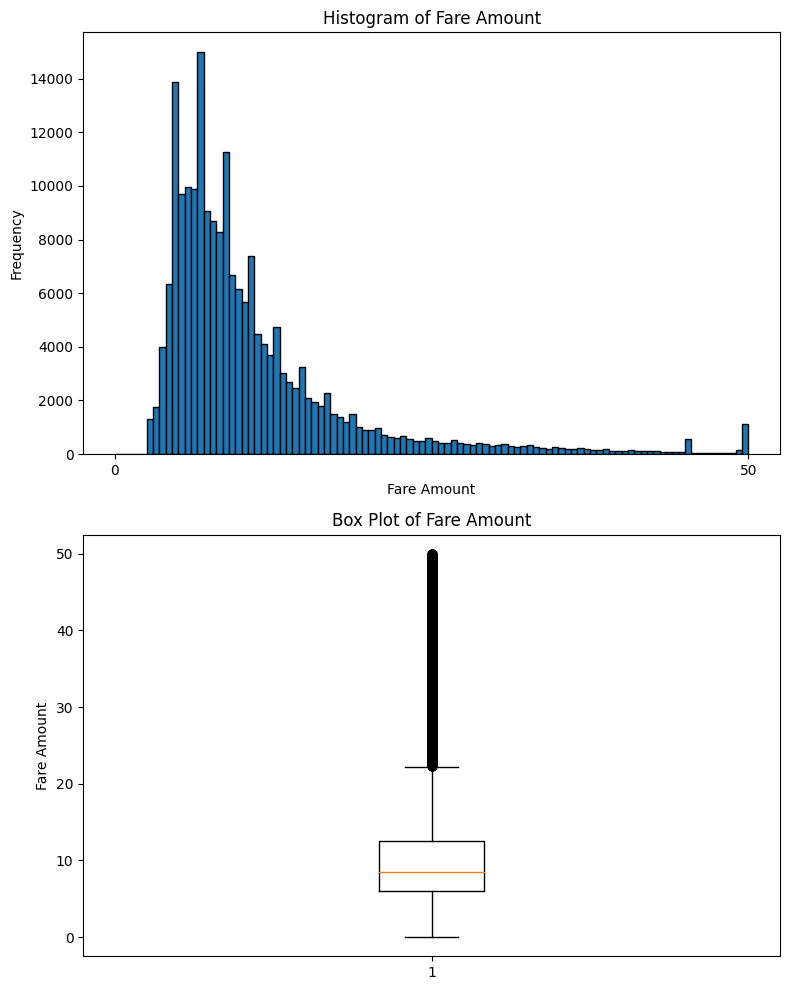

In [28]:
# visualizing the target variable

fare_amount = df['fare_amount']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plotting the histogram
ax1.hist(fare_amount, bins=100, edgecolor='black')

# Adding labels and title to the histogram
ax1.set_xlabel('Fare Amount')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Fare Amount')

# Setting the x-axis ticks every 20
ax1.set_xticks(range(0, int(max(fare_amount)) + 1, 50))

# Plotting the box plot
ax2.boxplot(fare_amount)

# Adding labels and title to the box plot
ax2.set_ylabel('Fare Amount')
ax2.set_title('Box Plot of Fare Amount')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The target variable now doesen't have any outliers

In [29]:
# The dataset also had very few records for the location cluster value other than 0 which can be deleted to have a generalized model

# Drop records where 'location_cluser' is not 0
df = df[(df['location_cluster'] == 0)]

# Reset the index of the modified dataframe
df.reset_index(drop=True, inplace=True)

In [30]:
df.shape

(193515, 11)

In [31]:
# we can also drop columns that are not needed to avoid collinearity

drop_columns = ['location_cluster','hour','quarter','week']

df = df.drop(columns = drop_columns, axis = 1)

df.head()

,fare_amount,passenger_count,year,month,day,distance,time_of_day
0,7.5,1,2015,5,7,1.0,evening
1,7.7,1,2009,7,17,1.5,night
2,12.9,1,2009,8,24,3.1,night
3,5.3,3,2009,6,26,1.0,morning
4,16.0,5,2014,8,28,2.8,evening


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193515 entries, 0 to 193514
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   fare_amount      193515 non-null  float64 
 1   passenger_count  193515 non-null  int64   
 2   year             193515 non-null  int64   
 3   month            193515 non-null  int64   
 4   day              193515 non-null  int64   
 5   distance         193515 non-null  float64 
 6   time_of_day      193515 non-null  category
dtypes: category(1), float64(2), int64(4)
memory usage: 9.0 MB


In [33]:
# converting to datatypes for categorical variables

# Convert 'passenger_count' to category
df['passenger_count'] = df['passenger_count'].astype('category')

# Convert 'year' to category
df['year'] = df['year'].astype('category')

# Convert 'month' to category
df['month'] = df['month'].astype('category')

# Convert 'day' to category
df['day'] = df['day'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193515 entries, 0 to 193514
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   fare_amount      193515 non-null  float64 
 1   passenger_count  193515 non-null  category
 2   year             193515 non-null  category
 3   month            193515 non-null  category
 4   day              193515 non-null  category
 5   distance         193515 non-null  float64 
 6   time_of_day      193515 non-null  category
dtypes: category(5), float64(2)
memory usage: 3.9 MB


In [34]:
# understanding the data spread for variable 'distance'
from tabulate import tabulate

# Assuming 'fare_amount' is a column in your dataframe 'df'
distance = df['distance']

# Define the range intervals
ranges = [
    ('Below 0', distance < 0),
    ('0-500', (distance >= 0) & (distance <= 500)),
    ('501-1000', (distance > 500) & (distance <= 1000)),
    ('1001 - Max', distance > 1000)
]

# Calculate the percentage of records in each range
percentage_records = []
total_records = len(distance)
for label, condition in ranges:
    count = len(distance[condition])
    percentage = (count / total_records) * 100
    percentage_records.append([label, percentage])

# Create the table
table_headers = ['Range', 'Percentage']
table = tabulate(percentage_records, headers=table_headers, floatfmt=".2f")

# Display the table
print(table)

Range         Percentage
----------  ------------
Below 0             0.00
0-500              99.91
501-1000            0.00
1001 - Max          0.09


We can see we have outliers in the dataframe for the variable distance that we can drop to have a more generalized model.

In [35]:
# drop records where distance is greater than 100
df = df[(df['distance'] <= 100)]

# Reset the index of the modified dataframe
df.reset_index(drop=True, inplace=True)

In [36]:
df.shape

(193329, 7)

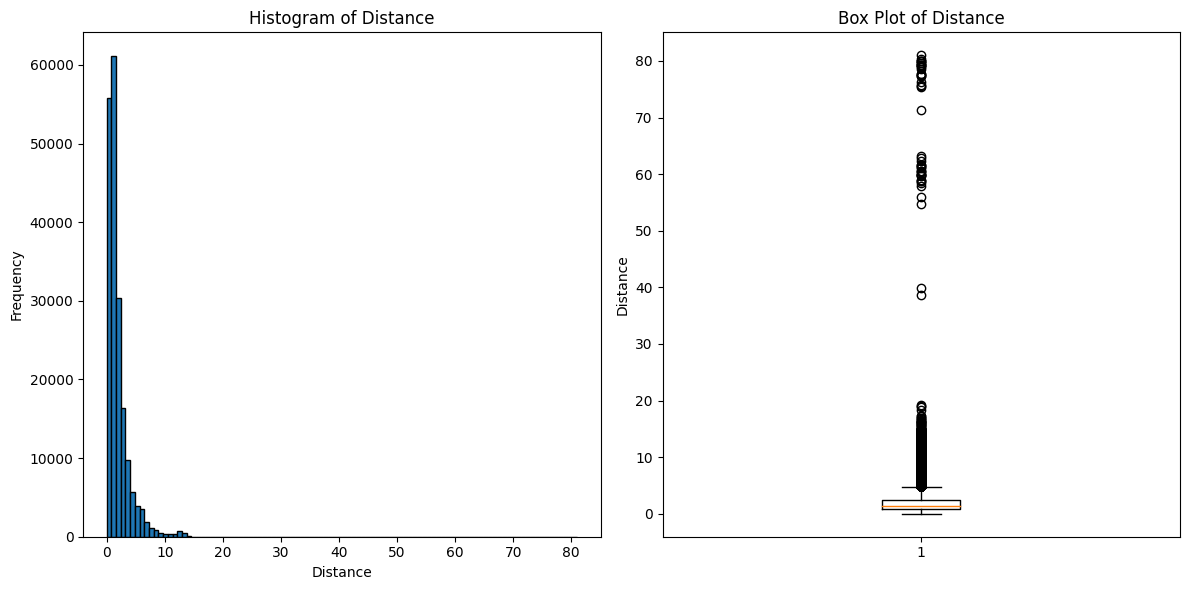

In [37]:
# Visualizing the numerical features in the dataframe

distance = df['distance']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the histogram
axes[0].hist(distance, bins=100, edgecolor='black')

# Adding labels and title to the histogram
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Distance')

# Plotting the box plot
axes[1].boxplot(distance)

# Adding labels and title to the box plot
axes[1].set_ylabel('Distance')
axes[1].set_title('Box Plot of Distance')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

We can now see that data field distance does not have outliers anymore.

In [38]:
# Calculate the distribution in percentage
percentage_dist = df['passenger_count'].value_counts(normalize=True) * 100

# Create a dataframe to display the distribution in a table format
table = pd.DataFrame({'Passenger Count': percentage_dist.index, 'Percentage': percentage_dist.values})

# Sort the dataframe by Passenger Count
table = table.sort_values('Passenger Count')

# Display the table
print(table)

  Passenger Count  Percentage
6               0    0.354318
0               1   69.233276
1               2   14.688433
3               3    4.442686
4               4    2.132634
2               5    7.022744
5               6    2.125392
7             208    0.000517


In [39]:
# Drop records where passenger_count = 208
df = df[df['passenger_count'] != 208]

# 4. Feature Engineering

In [40]:
df.head()

,fare_amount,passenger_count,year,month,day,distance,time_of_day
0,7.5,1,2015,5,7,1.0,evening
1,7.7,1,2009,7,17,1.5,night
2,12.9,1,2009,8,24,3.1,night
3,5.3,3,2009,6,26,1.0,morning
4,16.0,5,2014,8,28,2.8,evening


In [41]:
import numpy as np

# Assuming 'df' is your dataframe

# Apply log transformation to 'fare_amount'
df['fare_amount'] = np.log1p(df['fare_amount'])

# Apply log transformation to 'distance'
df['distance'] = np.log1p(df['distance'])

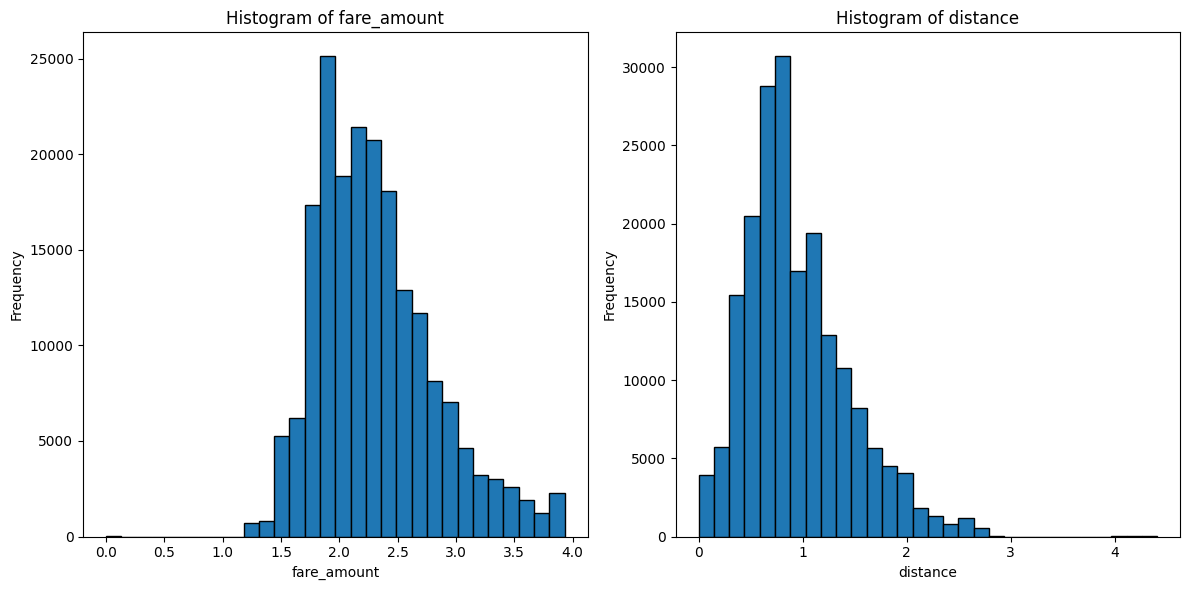

In [42]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for 'fare_amount'
axs[0].hist(df['fare_amount'], bins=30, edgecolor='black')
axs[0].set_xlabel('fare_amount')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of fare_amount')

# Plot histogram for 'distance'
axs[1].hist(df['distance'], bins=30, edgecolor='black')
axs[1].set_xlabel('distance')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of distance')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

We can see that the log transformation have helped the data to be more normally distributed

In [43]:
numerical_vars = df.select_dtypes(include=['int', 'float']).columns
df_numerical = df[numerical_vars]

# Separate categorical variables
categorical_vars = df.select_dtypes(include='category').columns
df_categorical = df[categorical_vars]

In [44]:
df_categorical.head()

,passenger_count,year,month,day,time_of_day
0,1,2015,5,7,evening
1,1,2009,7,17,night
2,1,2009,8,24,night
3,3,2009,6,26,morning
4,5,2014,8,28,evening


In [45]:
df_numerical.head()

,fare_amount,distance
0,2.140066,0.693147
1,2.163323,0.916291
2,2.631889,1.410987
3,1.840550,0.693147
4,2.833213,1.335001


In [46]:
# applying one hot encoding to the categorical dataframe

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_categorical)

# Drop the original categorical columns
df_categorical = df_categorical.drop(columns=df_categorical.columns)

# Concatenate the encoded columns with the original dataframe
df_categorical = pd.concat([df_categorical, df_encoded], axis=1)

In [47]:
df_categorical.head()

,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208,year_2009,year_2010,...,day_28,day_29,day_30,day_31,time_of_day_midnight,time_of_day_early_morning,time_of_day_morning,time_of_day_afternoon,time_of_day_evening,time_of_day_night
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [48]:
df_categorical = df_categorical.drop('passenger_count_208', axis = 1)

In [49]:
df_categorical.head()

,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,year_2010,year_2011,...,day_28,day_29,day_30,day_31,time_of_day_midnight,time_of_day_early_morning,time_of_day_morning,time_of_day_afternoon,time_of_day_evening,time_of_day_night
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [50]:
# Merge the dataframes back together
df = pd.concat([df_numerical, df_categorical], axis=1)

In [51]:
df.head()

,fare_amount,distance,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,year_2009,...,day_28,day_29,day_30,day_31,time_of_day_midnight,time_of_day_early_morning,time_of_day_morning,time_of_day_afternoon,time_of_day_evening,time_of_day_night
0,2.140066,0.693147,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.163323,0.916291,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2.631889,1.410987,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.840550,0.693147,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2.833213,1.335001,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [52]:
# save transformed dataframe to a csv file

file_path = '/content/drive/MyDrive/Data Science/Data Science Projects/Uber Predict Fare/Transformed Data/transformed.csv'

df.to_csv(file_path, index = False, header = True)

In [53]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the train data into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Separate the features and target variables
train_features = train_df.drop('fare_amount', axis=1)
train_target = train_df['fare_amount']

val_features = val_df.drop('fare_amount', axis=1)
val_target = val_df['fare_amount']

test_features = test_df.drop('fare_amount', axis=1)
test_target = test_df['fare_amount']

# 5. Preictive Modeling

In [54]:
# building and testing a linear regression and its various forms 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_validate_test_linear_regression(train_features, train_target, val_features, val_target, test_features, test_target):
    # Train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(train_features, train_target)

    # Train the Lasso Regression model
    lasso_model = Lasso()
    lasso_model.fit(train_features, train_target)

    # Train the Ridge Regression model
    ridge_model = Ridge()
    ridge_model.fit(train_features, train_target)

    # Train the Elastic Net model
    elastic_net_model = ElasticNet()
    elastic_net_model.fit(train_features, train_target)

    # Make predictions on validation and test sets
    lr_val_predictions = lr_model.predict(val_features)
    lasso_val_predictions = lasso_model.predict(val_features)
    ridge_val_predictions = ridge_model.predict(val_features)
    elastic_net_val_predictions = elastic_net_model.predict(val_features)

    lr_test_predictions = lr_model.predict(test_features)
    lasso_test_predictions = lasso_model.predict(test_features)
    ridge_test_predictions = ridge_model.predict(test_features)
    elastic_net_test_predictions = elastic_net_model.predict(test_features)

    # Calculate performance metrics on validation set
    val_metrics = {
        'Linear Regression': {
            'MSE': mean_squared_error(val_target, lr_val_predictions),
            'MAE': mean_absolute_error(val_target, lr_val_predictions),
            'R2': r2_score(val_target, lr_val_predictions)
        },
        'Lasso Regression': {
            'MSE': mean_squared_error(val_target, lasso_val_predictions),
            'MAE': mean_absolute_error(val_target, lasso_val_predictions),
            'R2': r2_score(val_target, lasso_val_predictions)
        },
        'Ridge Regression': {
            'MSE': mean_squared_error(val_target, ridge_val_predictions),
            'MAE': mean_absolute_error(val_target, ridge_val_predictions),
            'R2': r2_score(val_target, ridge_val_predictions)
        },
        'Elastic Net': {
            'MSE': mean_squared_error(val_target, elastic_net_val_predictions),
            'MAE': mean_absolute_error(val_target, elastic_net_val_predictions),
            'R2': r2_score(val_target, elastic_net_val_predictions)
        }
    }

    # Calculate performance metrics on test set
    test_metrics = {
        'Linear Regression': {
            'MSE': mean_squared_error(test_target, lr_test_predictions),
            'MAE': mean_absolute_error(test_target, lr_test_predictions),
            'R2': r2_score(test_target, lr_test_predictions)
        },
        'Lasso Regression': {
            'MSE': mean_squared_error(test_target, lasso_test_predictions),
            'MAE': mean_absolute_error(test_target, lasso_test_predictions),
            'R2': r2_score(test_target, lasso_test_predictions)
        },
        'Ridge Regression': {
            'MSE': mean_squared_error(test_target, ridge_test_predictions),
            'MAE': mean_absolute_error(test_target, ridge_test_predictions),
            'R2': r2_score(test_target, ridge_test_predictions)
        },
        'Elastic Net': {
            'MSE': mean_squared_error(test_target, elastic_net_test_predictions),
            'MAE': mean_absolute_error(test_target, elastic_net_test_predictions),
            'R2': r2_score(test_target, elastic_net_test_predictions)
        }
    }

    return val_metrics, test_metrics

In [55]:
val_metrics, test_metrics = train_validate_test_linear_regression(train_features, train_target, val_features, val_target, test_features, test_target)

In [56]:
def print_metrics(metrics, set_name):
    print(f"Metrics for {set_name} Set:")
    print("---------------------------")
    for model, values in metrics.items():
        print(f"{model}:")
        for metric, score in values.items():
            print(f" - {metric}: {score:.4f}")
        print("---------------------------")

# Assuming you have obtained the validation and test metrics from the previous function call
print_metrics(val_metrics, "Validation")
print_metrics(test_metrics, "Test")

Metrics for Validation Set:
---------------------------
Linear Regression:
 - MSE: 0.0631
 - MAE: 0.1667
 - R2: 0.7594
---------------------------
Lasso Regression:
 - MSE: 0.2624
 - MAE: 0.4007
 - R2: -0.0000
---------------------------
Ridge Regression:
 - MSE: 0.0631
 - MAE: 0.1667
 - R2: 0.7594
---------------------------
Elastic Net:
 - MSE: 0.2624
 - MAE: 0.4007
 - R2: -0.0000
---------------------------
Metrics for Test Set:
---------------------------
Linear Regression:
 - MSE: 0.0603
 - MAE: 0.1661
 - R2: 0.7683
---------------------------
Lasso Regression:
 - MSE: 0.2604
 - MAE: 0.4011
 - R2: -0.0000
---------------------------
Ridge Regression:
 - MSE: 0.0603
 - MAE: 0.1661
 - R2: 0.7683
---------------------------
Elastic Net:
 - MSE: 0.2604
 - MAE: 0.4011
 - R2: -0.0000
---------------------------


Looking at the metrics above, we are seeing a good R2 values of approximately 76% for our validation a test set using Linear Regression. This shows our model is not overfitting and is generalizing well. 

We can now build and comapre other complex models.

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the models
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()
neural_network = MLPRegressor()

# Train the models
decision_tree.fit(train_features, train_target)
random_forest.fit(train_features, train_target)
xgboost.fit(train_features, train_target)
neural_network.fit(train_features, train_target)

# Make predictions on the validation set
dt_val_predictions = decision_tree.predict(val_features)
rf_val_predictions = random_forest.predict(val_features)
xgb_val_predictions = xgboost.predict(val_features)
nn_val_predictions = neural_network.predict(val_features)

# Evaluate the models on the validation set
val_metrics = {
    'Decision Tree': {
        'MSE': mean_squared_error(val_target, dt_val_predictions),
        'MAE': mean_absolute_error(val_target, dt_val_predictions),
        'R2': r2_score(val_target, dt_val_predictions)
    },
    'Random Forest': {
        'MSE': mean_squared_error(val_target, rf_val_predictions),
        'MAE': mean_absolute_error(val_target, rf_val_predictions),
        'R2': r2_score(val_target, rf_val_predictions)
    },
    'XGBoost': {
        'MSE': mean_squared_error(val_target, xgb_val_predictions),
        'MAE': mean_absolute_error(val_target, xgb_val_predictions),
        'R2': r2_score(val_target, xgb_val_predictions)
    },
    'Neural Network': {
        'MSE': mean_squared_error(val_target, nn_val_predictions),
        'MAE': mean_absolute_error(val_target, nn_val_predictions),
        'R2': r2_score(val_target, nn_val_predictions)
    }
}

# Print the validation metrics
print("Validation Set Metrics:")
for model, metrics in val_metrics.items():
    print(f"{model}:")
    print(" - MSE:", metrics['MSE'])
    print(" - MAE:", metrics['MAE'])
    print(" - R2:", metrics['R2'])
    print()

# Make predictions on the test set
dt_test_predictions = decision_tree.predict(test_features)
rf_test_predictions = random_forest.predict(test_features)
xgb_test_predictions = xgboost.predict(test_features)
nn_test_predictions = neural_network.predict(test_features)

# Evaluate the models on the test set
test_metrics = {
    'Decision Tree': {
        'MSE': mean_squared_error(test_target, dt_test_predictions),
        'MAE': mean_absolute_error(test_target, dt_test_predictions),
        'R2': r2_score(test_target, dt_test_predictions)
    },
    'Random Forest': {
        'MSE': mean_squared_error(test_target, rf_test_predictions),
        'MAE': mean_absolute_error(test_target, rf_test_predictions),
        'R2': r2_score(test_target, rf_test_predictions)
    },
    'XGBoost': {
        'MSE': mean_squared_error(test_target, xgb_test_predictions),
        'MAE': mean_absolute_error(test_target, xgb_test_predictions),
        'R2': r2_score(test_target, xgb_test_predictions)
    },
    'Neural Network': {
        'MSE': mean_squared_error(test_target, nn_test_predictions),
        'MAE': mean_absolute_error(test_target, nn_test_predictions),
        'R2': r2_score(test_target, nn_test_predictions)
    }
}

# Print the test metrics
print("Test Set Metrics:")
for model, metrics in test_metrics.items():
    print(f"{model}:")
    print(" - MSE:", metrics['MSE'])
    print(" - MAE:", metrics['MAE'])
    print(" - R2:", metrics['R2'])
    print()


Validation Set Metrics:
Decision Tree:
 - MSE: 0.09886559408308054
 - MAE: 0.21751826258330326
 - R2: 0.6231738179915058

Random Forest:
 - MSE: 0.0598862373470167
 - MAE: 0.16959408703480577
 - R2: 0.7717436244264397

XGBoost:
 - MSE: 0.05326786277709265
 - MAE: 0.15805051313532684
 - R2: 0.7969695571021773

Neural Network:
 - MSE: 0.054886540530144516
 - MAE: 0.16354740192880765
 - R2: 0.7907999673349622

Test Set Metrics:
Decision Tree:
 - MSE: 0.09516362345124621
 - MAE: 0.214773809617153
 - R2: 0.6345613302998259

Random Forest:
 - MSE: 0.05817415593275217
 - MAE: 0.16884098854698648
 - R2: 0.7766049107421094

XGBoost:
 - MSE: 0.05184900403714348
 - MAE: 0.1572428680077649
 - R2: 0.8008941823204133

Neural Network:
 - MSE: 0.053964748027749185
 - MAE: 0.16261068784435917
 - R2: 0.7927694951625184



Comparing all the models above, we can see that XGBoost has overall the best performance with an R2 value of 80%. The model is not overfitting and generalizing well to the train, validate and test dataset. 

In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Create the XGBoost model with GPU support
xgboost_model = XGBRegressor(tree_method='gpu_hist')

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(xgboost_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(train_features, train_target)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the training set
best_model.fit(train_features, train_target)

# Evaluate the best model on the validation set
val_predictions = best_model.predict(val_features)
val_mse = mean_squared_error(val_target, val_predictions)
val_mae = mean_absolute_error(val_target, val_predictions)
val_r2 = r2_score(val_target, val_predictions)

# Evaluate the best model on the test set
test_predictions = best_model.predict(test_features)
test_mse = mean_squared_error(test_target, test_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)
test_r2 = r2_score(test_target, test_predictions)

# Print the best hyperparameters and performance metrics
print("Best Hyperparameters:", best_params)
print("Validation Set Metrics:")
print(" - MSE:", val_mse)
print(" - MAE:", val_mae)
print(" - R2:", val_r2)
print()
print("Test Set Metrics:")
print(" - MSE:", test_mse)
print(" - MAE:", test_mae)
print(" - R2:", test_r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Validation Set Metrics:
 - MSE: 0.052479093418514415
 - MAE: 0.15734619314559953
 - R2: 0.7999759512743354

Test Set Metrics:
 - MSE: 0.051111899402087047
 - MAE: 0.15660533173514204
 - R2: 0.8037247443303063


In [61]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the XGBoost model with the best hyperparameters
xgboost_model = XGBRegressor(n_estimators=best_params['n_estimators'],
                             learning_rate=best_params['learning_rate'],
                             max_depth=best_params['max_depth'])

# Train the XGBoost model on the training set
xgboost_model.fit(train_features, train_target)

# Predict on the validation set
val_predictions = xgboost_model.predict(val_features)

# Calculate the performance metrics on the validation set
val_mse = mean_squared_error(val_target, val_predictions)
val_mae = mean_absolute_error(val_target, val_predictions)
val_r2 = r2_score(val_target, val_predictions)

# Predict on the test set
test_predictions = xgboost_model.predict(test_features)

# Calculate the performance metrics on the test set
test_mse = mean_squared_error(test_target, test_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)
test_r2 = r2_score(test_target, test_predictions)

# Print the performance metrics
print("Validation Set Metrics:")
print(" - MSE:", val_mse)
print(" - MAE:", val_mae)
print(" - R2:", val_r2)
print()
print("Test Set Metrics:")
print(" - MSE:", test_mse)
print(" - MAE:", test_mae)
print(" - R2:", test_r2)


Validation Set Metrics:
 - MSE: 0.05249740690252551
 - MAE: 0.15739443617497131
 - R2: 0.7999061494355544

Test Set Metrics:
 - MSE: 0.05115467099836415
 - MAE: 0.15667177274133937
 - R2: 0.8035604967462232


In [62]:
# Save the XGBoost model to a file
model_path = '/content/drive/MyDrive/Data Science/Data Science Projects/Uber Predict Fare/model.xgb'  # Specify the file path to save the model
xgboost_model.save_model(model_path)

print("XGBoost model saved successfully.")

XGBoost model saved successfully.
